In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sbody = '2004 PY107'
objname = '2004PY107'
dt=500.
#path = 'Asteroids/'+objname
path = 'TNOs/'+objname
series = pd.read_csv(path+'/series.csv')

t = series['t'].values
a = series['a'].values
e = series['e'].values
inc = series['inc'].values*np.pi/180
#omega = series['omega'].values*np.pi/180
#Omega = series['Omega'].values*np.pi/180
#M = series['M'].values*np.pi/180
#h = np.sin(inc)*np.sin(Omega)
#k = np.sin(inc)*np.cos(Omega)
#p = e*np.sin(Omega+omega)
#q = e*np.cos(Omega+omega)

hj = series['hj'].values
kj = series['kj'].values
pj = series['pj'].values
qj = series['qj'].values

hs = series['hs'].values
ks = series['ks'].values
ps = series['ps'].values
qs = series['qs'].values

hn = series['hn'].values
kn = series['kn'].values
pn = series['pn'].values
qn = series['qn'].values

hu = series['hu'].values
ku = series['ku'].values
pu = series['pu'].values
qu = series['qu'].values

plt.scatter(t,h)
plt.show()
plt.scatter(t,h-np.sin(t))

NameError: name 'h' is not defined

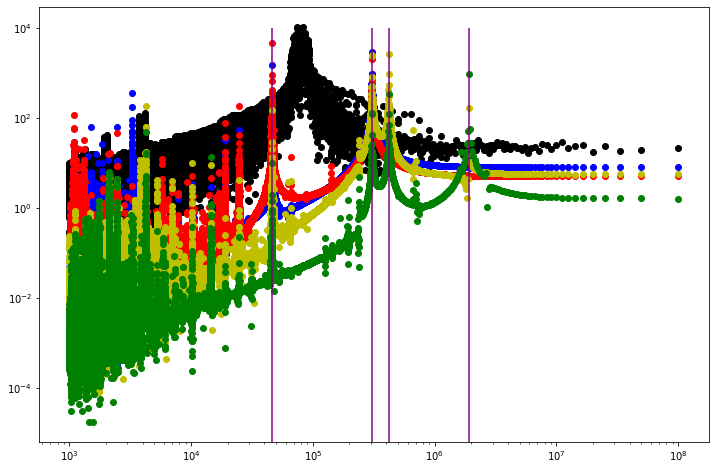

In [16]:
pYh = np.abs(np.fft.rfft(h))
pYhj = np.abs(np.fft.rfft(hj))
pYhs = np.abs(np.fft.rfft(hs))
pYhu = np.abs(np.fft.rfft(hu))
pYhn = np.abs(np.fft.rfft(hn))

ihumax = np.argmax(pYhu[1:])+1
ihnmax = np.argmax(pYhn[1:])+1 
ihsmax = np.argmax(pYhs[1:])+1 
ihjmax = np.argmax(pYhj[1:])+1 

n = len(h)
freq = np.fft.rfftfreq(n,d=dt)
plt.figure(figsize=(12,8))
xs = [1,10000]
plt.vlines(x = [1/freq[ihumax], 1/freq[ihnmax], 1/freq[ihsmax], 1/freq[ihjmax]], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')
plt.scatter(1/freq[1:],pYh[1:],label='particle',c='k')
plt.scatter(1/freq[1:],pYhj[1:],label='particle',c='b')
plt.scatter(1/freq[1:],pYhs[1:],label='particle',c='r')
plt.scatter(1/freq[1:],pYhu[1:],label='particle',c='y')
plt.scatter(1/freq[1:],pYhn[1:],label='particle',c='g')
plt.xscale('log')
plt.yscale('log')

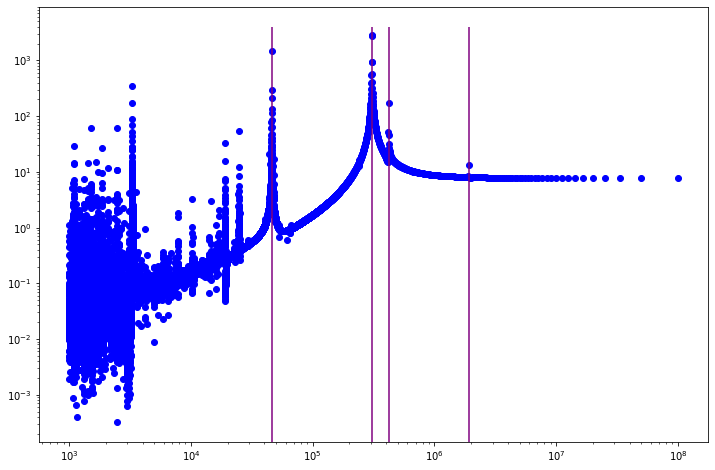

In [22]:
plt.figure(figsize=(12,8))
xs = [1,4000]
plt.vlines(x = [1/freq[ihumax], 1/freq[ihnmax], 1/freq[ihsmax], 1/freq[ihjmax]], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')
plt.scatter(1/freq[1:],pYhj[1:],label='particle',c='b')
plt.xscale('log')
plt.yscale('log')

100001 327
[-8.36205031e-05  8.02021116e-01  4.27867825e-01]


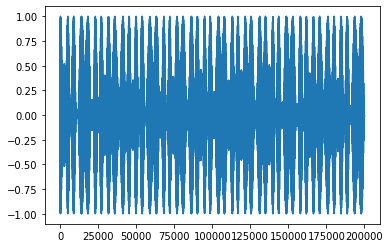

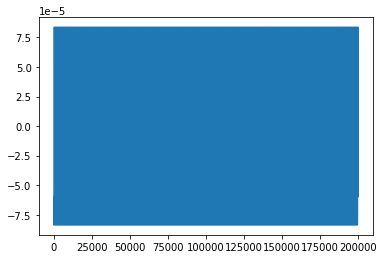

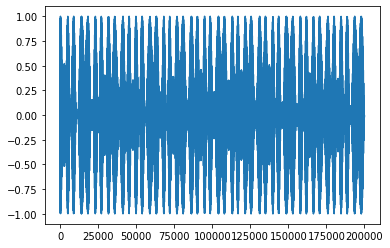

In [85]:
from scipy.optimize import minimize 
from scipy import stats
#x = np.linspace(-10, 30, 100)

print(len(pYhj),ihjmax)
x = t

#print(x)

# create a normally distributed residual
e = np.random.normal(10, 5, 100)

# generate ground truth
y = h

def MLE_Norm(parameters, freq):
    # extract parameters
    const, phase, std_dev = parameters
    # predict the output
    pred = const*np.sin(freq*2*np.pi*t+phase)
    #pred = const/beta/np.sqrt(2*np.pi)*np.exp(-0.5*((x-std_dev)/beta)**2)
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL

mle_model = minimize(MLE_Norm, np.array([1,0.5,2]), method='Nelder-Mead', args=freq[ihjmax])
print(mle_model.x)

plt.plot(y)
plt.show()
const = mle_model.x[0]
phase = mle_model.x[1]
std_dev = mle_model.x[2]

#const = 35000
#beta = 300
#std_dev = 5
guess = const*np.sin(freq[ihjmax]*2*np.pi*x+phase)
#print(guess)
plt.plot(guess)
plt.show()

plt.plot(y-guess)


In [4]:
from rocks import Rock
ceres = Rock("2004 py107")
print(ceres.e)

0.09768007 +- 0.00000010 


Index(['Unnamed: 0', 'h_j_amp', 'k_j_amp', 'p_j_amp', 'q_j_amp', 'h_s_amp',
       'k_s_amp', 'p_s_amp', 'q_s_amp', 'h_u_amp', 'k_u_amp', 'p_u_amp',
       'q_u_amp', 'h_n_amp', 'k_n_amp', 'p_n_amp', 'q_n_amp', 'h_j_freq',
       'k_j_freq', 'p_j_freq', 'q_j_freq', 'h_s_freq', 'k_s_freq', 'p_s_freq',
       'q_s_freq', 'h_u_freq', 'k_u_freq', 'p_u_freq', 'q_u_freq', 'h_n_freq',
       'k_n_freq', 'p_n_freq', 'q_n_freq'],
      dtype='object')
Index(['Name', 'mag.', 'a(AU)', 'e', 'sinI', 'n(deg/yr)', 'g("/y)', 's("/yr)',
       'LCEx1E6', 'My'],
      dtype='object')
obj  33340  was ejected in simulation
obj  119067  was ejected in simulation
obj  119069  was ejected in simulation
obj  307463  was ejected in simulation
obj  385571  was ejected in simulation
obj  385695  was ejected in simulation
obj  470308  was ejected in simulation
obj  2000 FB8  was ejected in simulation
obj  2002 CE251  was ejected in simulation
obj  2002 PU170  was ejected in simulation
obj  2005 EX318  was ejected

KeyError: 'a(AU)'

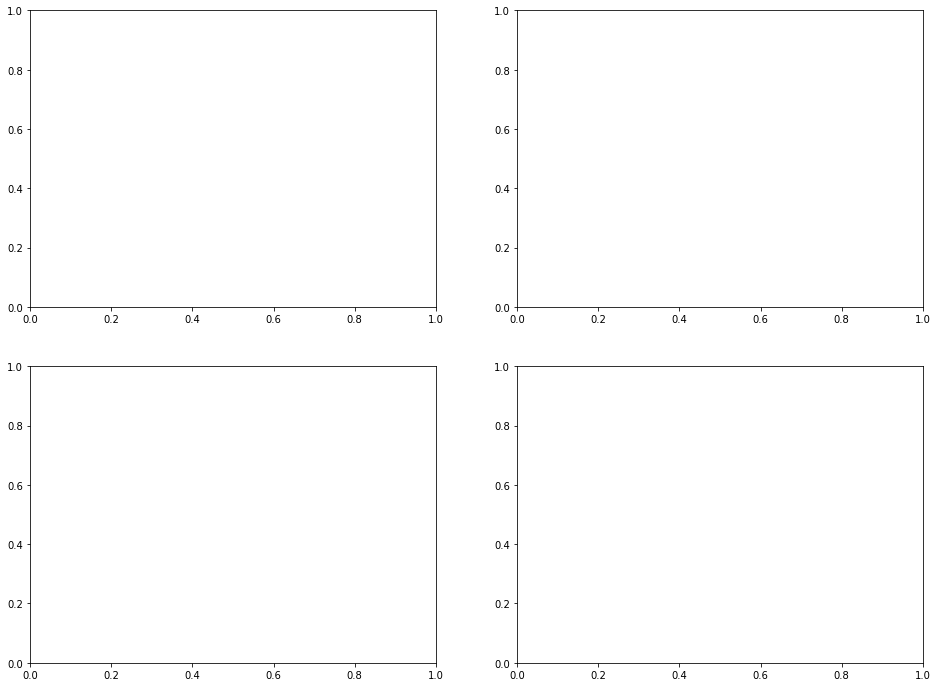

In [128]:
gp_data = pd.read_csv('gp_freqs.csv')

astdys = pd.read_csv('TNOs/astdys_tnos.csv')
print(gp_data.columns)
print(astdys.columns)
drop_cols = []
for i in range(len(astdys)):
    obj = astdys['Name'][i]
    horizons = pd.read_csv('TNOs/'+obj+'/horizon_data.csv')
    
    series = pd.read_csv('TNOs/'+obj+'/series.csv')
    if horizons['flag'][0] == 0:
        drop_cols.append(i)
        #print('obj ', obj, ' didn\'t run because of jpl horizons')
    
    vals = series['ecc'].values >= 1
    if np.any(vals):
        drop_cols.append(i)
        print('obj ', obj, ' was ejected in simulation')

astdys = astdys.drop(drop_cols)
astdys = gp_data.drop(drop_cols)
print(len(drop_cols), ' systems cannot produce good proper elements due to JPL Horizons or an ejection during simulation')
fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(astdys['a(AU)'],1/gp_data['h_j_freq'],c=gp_data['h_j_amp'],vmin=np.mean(gp_data['h_j_amp'])-np.std(gp_data['h_j_amp']),vmax=np.mean(gp_data['h_j_amp'])+np.std(gp_data['h_j_amp']),s=4)
im2 = ax[0,1].scatter(astdys['a(AU)'],1/gp_data['k_j_freq'],c=gp_data['k_j_amp'],s=1)
im3 = ax[1,0].scatter(astdys['a(AU)'],1/gp_data['p_j_freq'],c=gp_data['p_j_amp'],s=1)
im4 = ax[1,1].scatter(astdys['a(AU)'],1/gp_data['q_j_freq'],c=gp_data['q_j_amp'],s=1)
ax[0,0].set_xlabel('SMA (AU)')
ax[0,0].set_ylabel('Peak Period (yrs)')
ax[0,1].set_xlabel('SMA (AU)')
ax[0,1].set_ylabel('Peak Period (yrs)')
ax[1,0].set_xlabel('SMA (AU)')
ax[1,0].set_ylabel('Peak Period (yrs)')
ax[1,1].set_xlabel('SMA (AU)')
ax[1,1].set_ylabel('Peak Period (yrs)')

ax[0,0].set_ylim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Jupiter Peak Amplitudes')
plt.show()


Index(['Unnamed: 0', 'h_j_amp', 'k_j_amp', 'p_j_amp', 'q_j_amp', 'h_s_amp',
       'k_s_amp', 'p_s_amp', 'q_s_amp', 'h_u_amp', 'k_u_amp', 'p_u_amp',
       'q_u_amp', 'h_n_amp', 'k_n_amp', 'p_n_amp', 'q_n_amp', 'h_j_freq',
       'k_j_freq', 'p_j_freq', 'q_j_freq', 'h_s_freq', 'k_s_freq', 'p_s_freq',
       'q_s_freq', 'h_u_freq', 'k_u_freq', 'p_u_freq', 'q_u_freq', 'h_n_freq',
       'k_n_freq', 'p_n_freq', 'q_n_freq'],
      dtype='object')
Index(['Name', 'mag.', 'a(AU)', 'e', 'sinI', 'n(deg/yr)', 'g("/y)', 's("/yr)',
       'LCEx1E6', 'My'],
      dtype='object')


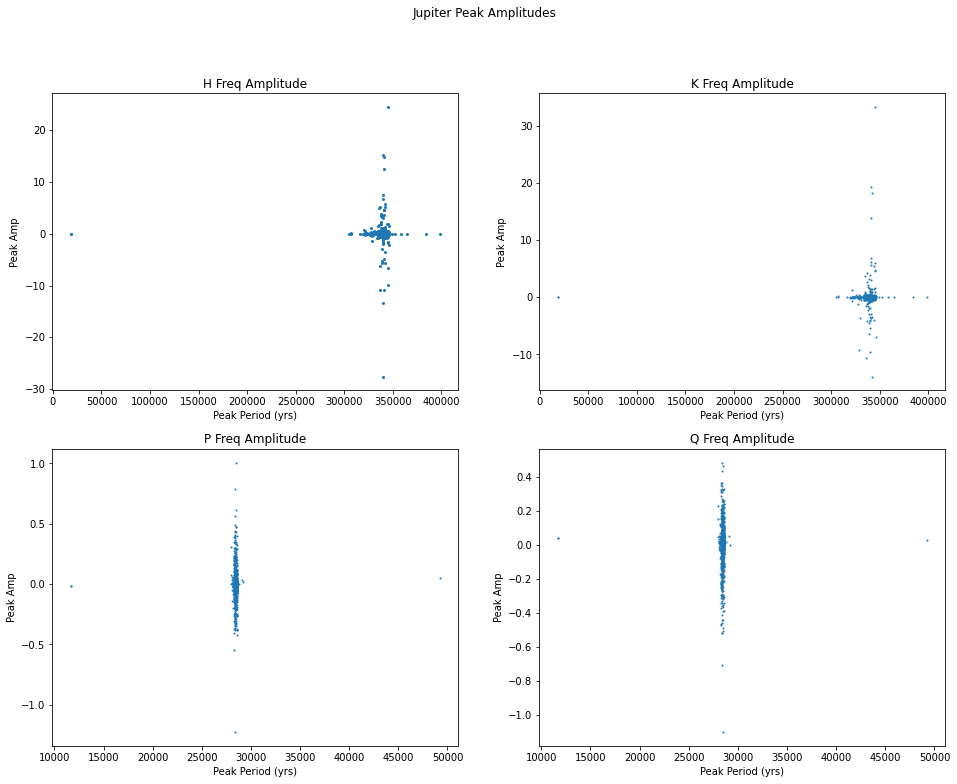

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
gp_data = pd.read_csv('gp_freqs.csv')

astdys = pd.read_csv('TNOs/astdys_tnos.csv')
print(gp_data.columns)
print(astdys.columns)

for i in range(len(astdys)):
    obj = astdys['Name'][i]
    horizons = pd.read_csv('TNOs/'+obj+'/horizon_data.csv')
    if horizons['flag'][0] == 0:
        gp_data = gp_data.drop([i])
        astdys = astdys.drop([i])

fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(1/gp_data['h_j_freq'],gp_data['h_j_amp'],s=4)
im2 = ax[0,1].scatter(1/gp_data['k_j_freq'],gp_data['k_j_amp'],s=1)
im3 = ax[1,0].scatter(1/gp_data['p_j_freq'],gp_data['p_j_amp'],s=1)
im4 = ax[1,1].scatter(1/gp_data['q_j_freq'],gp_data['q_j_amp'],s=1)
ax[0,0].set_ylabel('Peak Amp')
ax[0,0].set_xlabel('Peak Period (yrs)')
ax[0,1].set_ylabel('Peak Amp')
ax[0,1].set_xlabel('Peak Period (yrs)')
ax[1,0].set_ylabel('Peak Amp')
ax[1,0].set_xlabel('Peak Period (yrs)')
ax[1,1].set_ylabel('Peak Amp')
ax[1,1].set_xlabel('Peak Period (yrs)')

#ax[0,0].set_ylim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(im1,ax=ax[0,0])
#fig.colorbar(im2,ax=ax[0,1])
#fig.colorbar(im3,ax=ax[1,0])
#fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Jupiter Peak Amplitudes')
plt.show()

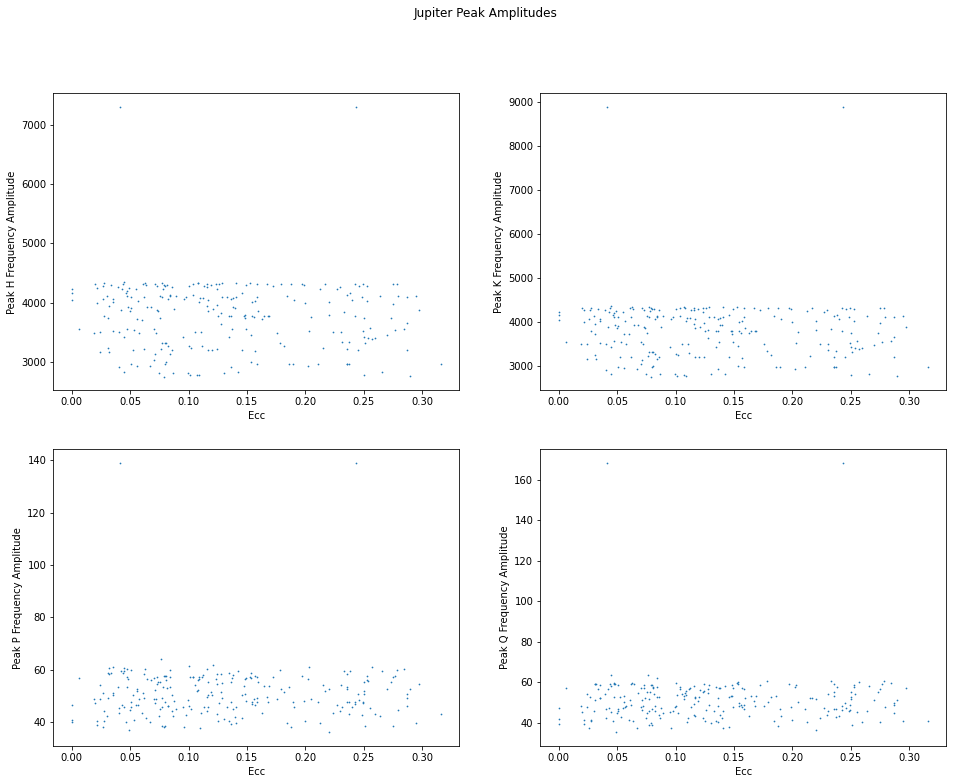

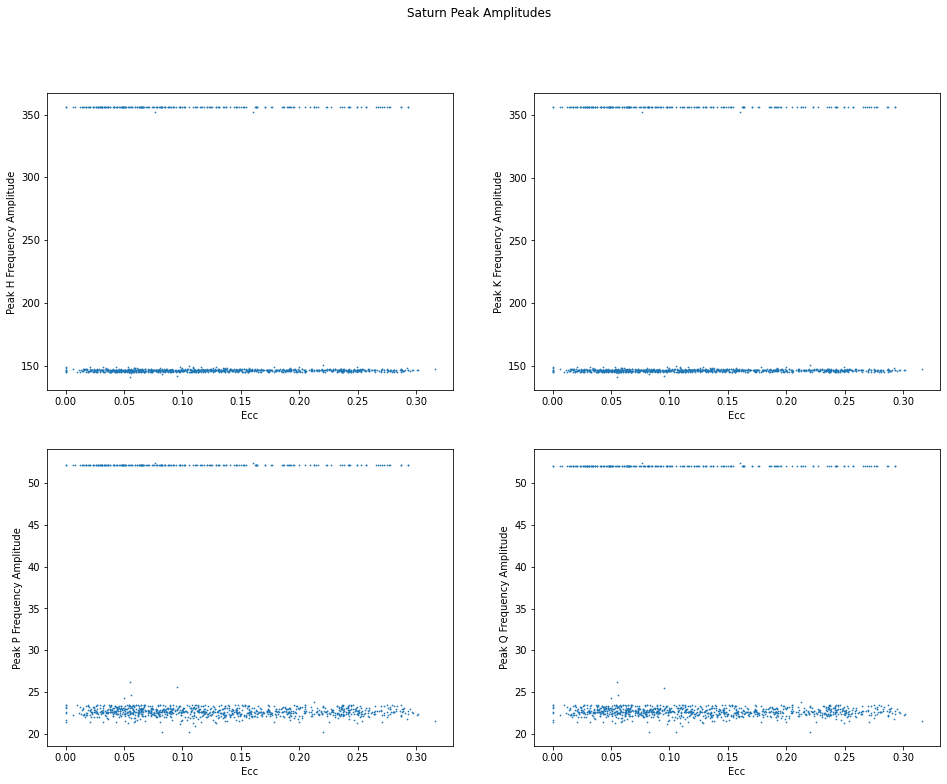

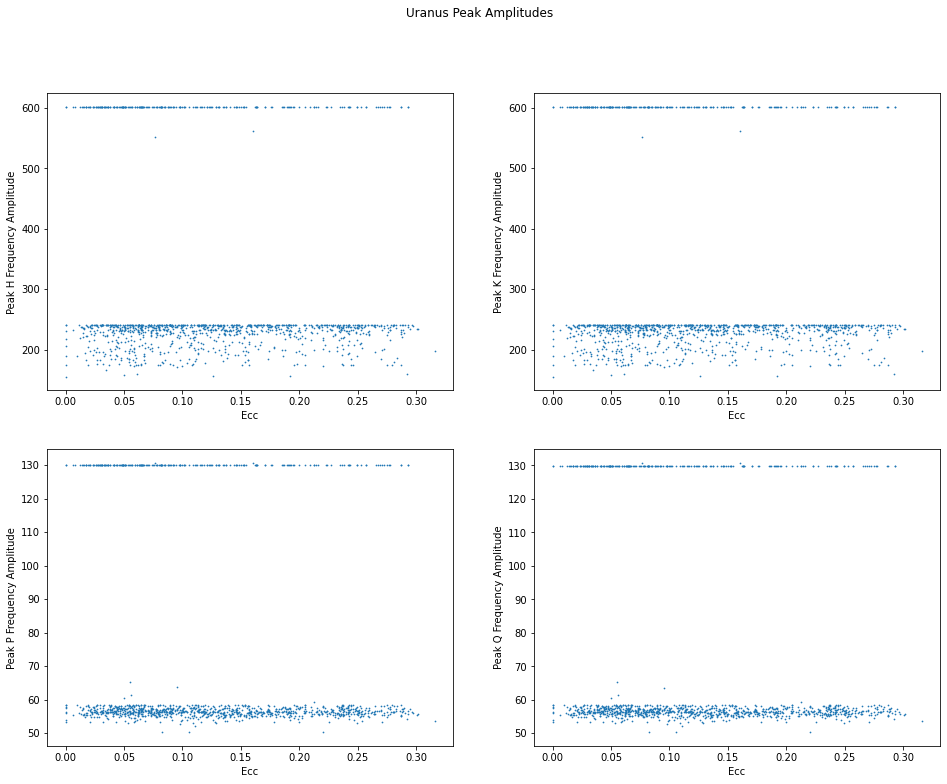

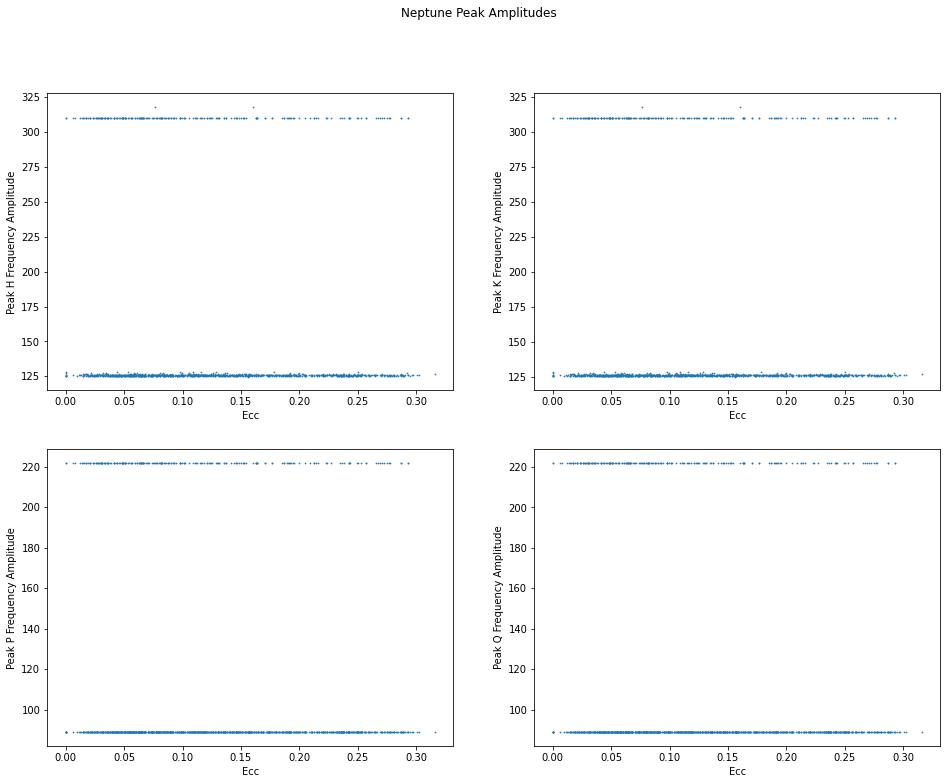

In [74]:

fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['e'][0:242],gp_data['h_j_max'][0:242],s=0.5)
ax[0,1].scatter(astdys['e'][0:242],gp_data['k_j_max'][0:242],s=0.5)
ax[1,0].scatter(astdys['e'][0:242],gp_data['p_j_max'][0:242],s=0.5)
ax[1,1].scatter(astdys['e'][0:242],gp_data['q_j_max'][0:242],s=0.5)
ax[0,0].set_xlabel('Ecc')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('Ecc')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('Ecc')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('Ecc')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Jupiter Peak Amplitudes')
plt.show()

fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['e'],gp_data['h_s_max'],s=0.5)
ax[0,1].scatter(astdys['e'],gp_data['k_s_max'],s=0.5)
ax[1,0].scatter(astdys['e'],gp_data['p_s_max'],s=0.5)
ax[1,1].scatter(astdys['e'],gp_data['q_s_max'],s=0.5)
ax[0,0].set_xlabel('Ecc')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('Ecc')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('Ecc')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('Ecc')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Saturn Peak Amplitudes')
plt.show()

fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['e'],gp_data['h_u_max'],s=0.5)
ax[0,1].scatter(astdys['e'],gp_data['k_u_max'],s=0.5)
ax[1,0].scatter(astdys['e'],gp_data['p_u_max'],s=0.5)
ax[1,1].scatter(astdys['e'],gp_data['q_u_max'],s=0.5)
ax[0,0].set_xlabel('Ecc')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('Ecc')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('Ecc')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('Ecc')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Uranus Peak Amplitudes')
plt.show()

fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['e'],gp_data['h_n_max'],s=0.5)
ax[0,1].scatter(astdys['e'],gp_data['k_n_max'],s=0.5)
ax[1,0].scatter(astdys['e'],gp_data['p_n_max'],s=0.5)
ax[1,1].scatter(astdys['e'],gp_data['q_n_max'],s=0.5)
ax[0,0].set_xlabel('Ecc')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('Ecc')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('Ecc')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('Ecc')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Neptune Peak Amplitudes')
plt.show()

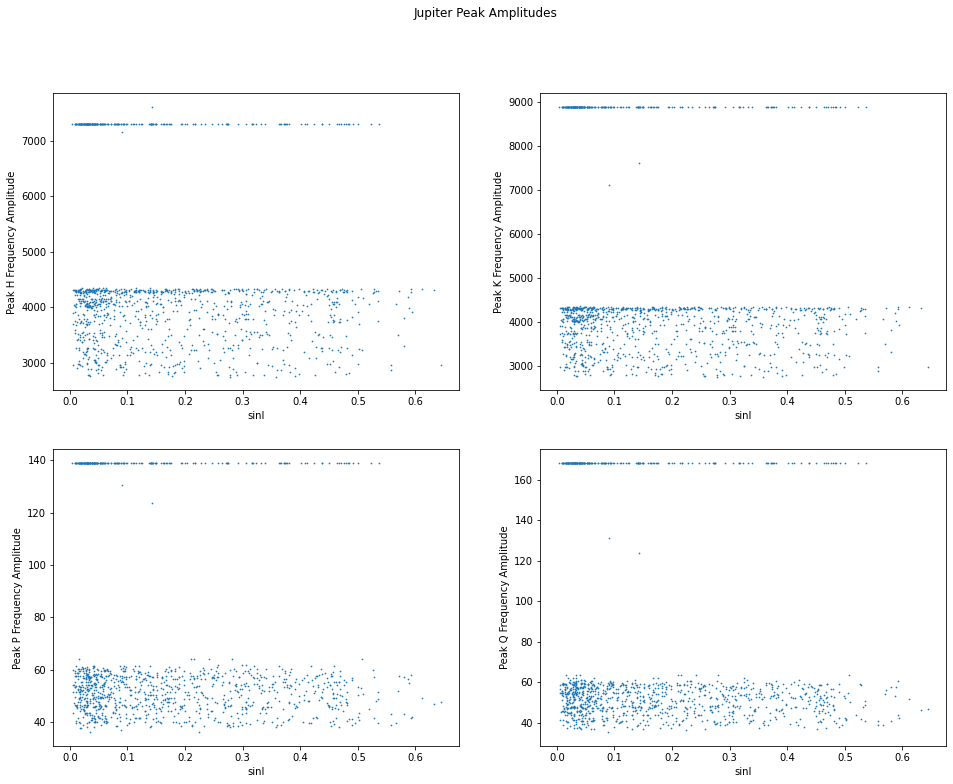

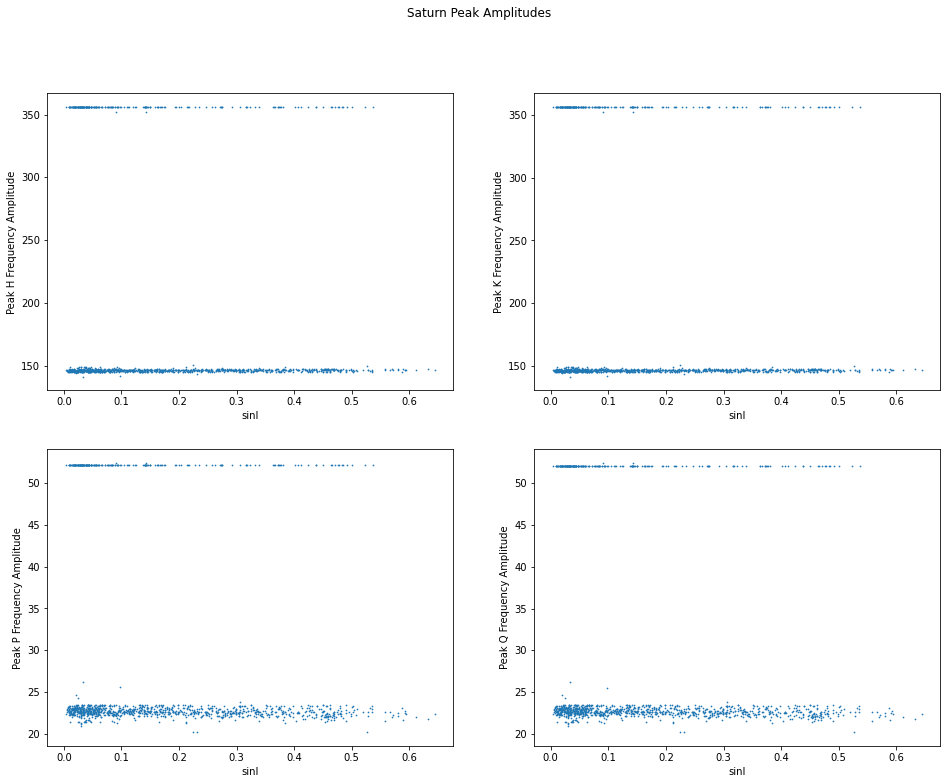

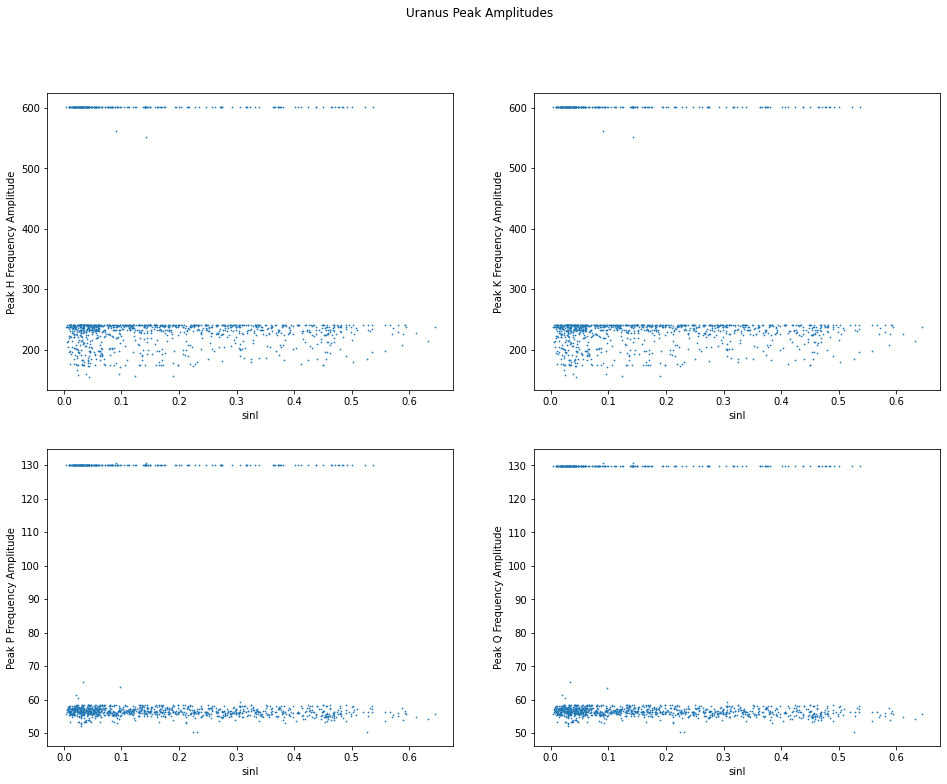

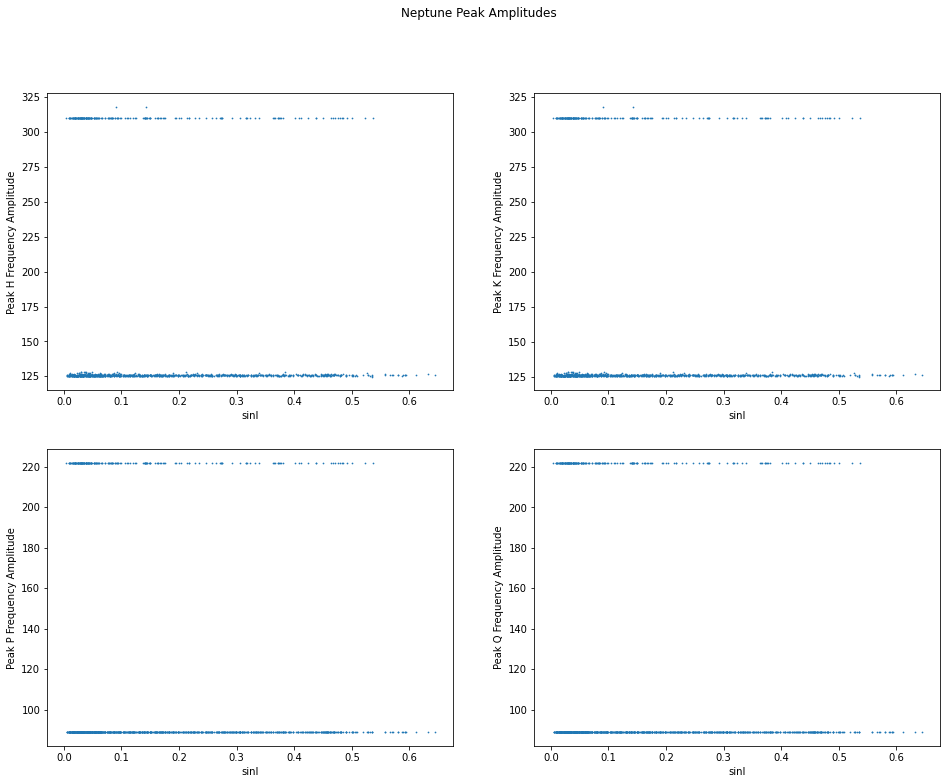

In [75]:
fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['sinI'],gp_data['h_j_max'],s=0.5)
ax[0,1].scatter(astdys['sinI'],gp_data['k_j_max'],s=0.5)
ax[1,0].scatter(astdys['sinI'],gp_data['p_j_max'],s=0.5)
ax[1,1].scatter(astdys['sinI'],gp_data['q_j_max'],s=0.5)
ax[0,0].set_xlabel('sinI')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('sinI')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('sinI')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('sinI')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Jupiter Peak Amplitudes')
plt.show()

fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['sinI'],gp_data['h_s_max'],s=0.5)
ax[0,1].scatter(astdys['sinI'],gp_data['k_s_max'],s=0.5)
ax[1,0].scatter(astdys['sinI'],gp_data['p_s_max'],s=0.5)
ax[1,1].scatter(astdys['sinI'],gp_data['q_s_max'],s=0.5)
ax[0,0].set_xlabel('sinI')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('sinI')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('sinI')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('sinI')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Saturn Peak Amplitudes')
plt.show()

fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['sinI'],gp_data['h_u_max'],s=0.5)
ax[0,1].scatter(astdys['sinI'],gp_data['k_u_max'],s=0.5)
ax[1,0].scatter(astdys['sinI'],gp_data['p_u_max'],s=0.5)
ax[1,1].scatter(astdys['sinI'],gp_data['q_u_max'],s=0.5)
ax[0,0].set_xlabel('sinI')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('sinI')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('sinI')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('sinI')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Uranus Peak Amplitudes')
plt.show()

fig,ax = plt.subplots(2,2, figsize=(16,12))
ax[0,0].scatter(astdys['sinI'],gp_data['h_n_max'],s=0.5)
ax[0,1].scatter(astdys['sinI'],gp_data['k_n_max'],s=0.5)
ax[1,0].scatter(astdys['sinI'],gp_data['p_n_max'],s=0.5)
ax[1,1].scatter(astdys['sinI'],gp_data['q_n_max'],s=0.5)
ax[0,0].set_xlabel('sinI')
ax[0,0].set_ylabel('Peak H Frequency Amplitude')
ax[0,1].set_xlabel('sinI')
ax[0,1].set_ylabel('Peak K Frequency Amplitude')
ax[1,0].set_xlabel('sinI')
ax[1,0].set_ylabel('Peak P Frequency Amplitude')
ax[1,1].set_xlabel('sinI')
ax[1,1].set_ylabel('Peak Q Frequency Amplitude')
plt.suptitle('Neptune Peak Amplitudes')
plt.show()

236


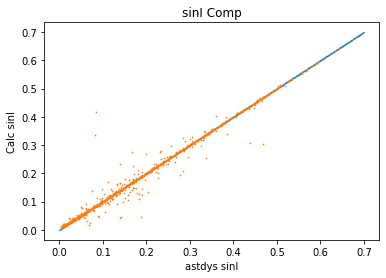

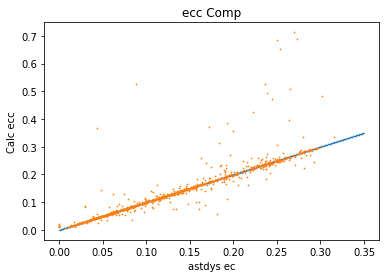

In [129]:
prop_elem = pd.read_csv('prop_elem.csv')
prop_elem = prop_elem.drop(drop_cols)

print(len(drop_cols))
#for i in range(len(astdys)):
#    series = pd.read_csv()
data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.7
plt.scatter(data,data,s=0.1)
plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=0.5)
plt.title('sinI Comp')
plt.xlabel('astdys sinI')
plt.ylabel('Calc sinI')
#plt.gca().set_aspect('equal')
plt.show()

data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.35
plt.scatter(data,data,s=0.1)
plt.scatter(prop_elem['ast_ecc'],prop_elem['calc_ecc'],s=0.5)
#plt.gca().set_aspect('equal')
plt.title('ecc Comp')
plt.xlabel('astdys ec')
plt.ylabel('Calc ecc')
plt.show()

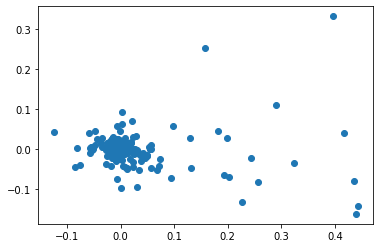

0.4045420768713776 1.6632467541236844
sinI Stddev:  0.020634525232544946
Ecc Stddev:  0.041542312224896835


In [109]:
sinI_res = prop_elem['calc_sinI']-prop_elem['ast_sinI']
ecc_res = prop_elem['calc_ecc']-prop_elem['ast_ecc']

plt.scatter(ecc_res,sinI_res)
plt.show()
#plt.plot(ecc_res)
#plt.show()

stddev_i = np.sqrt(np.sum(sinI_res**2)/len(sinI_res))
stddev_e = np.sqrt(np.sum(ecc_res**2)/len(sinI_res))

stddev_i = np.std(sinI_res)
stddev_e = np.std(ecc_res)
print(np.sum(sinI_res**2),np.sum(ecc_res**2))
print('sinI Stddev: ', stddev_i)
print('Ecc Stddev: ',stddev_e)